In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\MY PC\Desktop\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking Missing Values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are only 891 rows in the titanic data frame. Cabin has almost all missing values, so we can drop that variable completely
- Age seems like a relevant predictor for survival right so We'd want to keep the variables, but it has 177 missing values.

# Dropping These Variables

- Fare 
- Person's name, ticket number, and passenger ID number? # Identity columns
- Cabin

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['Embarked'] = df['Embarked']

In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
X.head()

,sex,age,pclass,sibsp,parch,Embarked
0,male,22.0,3,1,0,S
1,female,38.0,1,1,0,C
2,female,26.0,3,0,0,S
3,female,35.0,1,1,0,S
4,male,35.0,3,0,0,S


In [10]:
y = df['Survived']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Treating Missing Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013365747188>]],
      dtype=object)

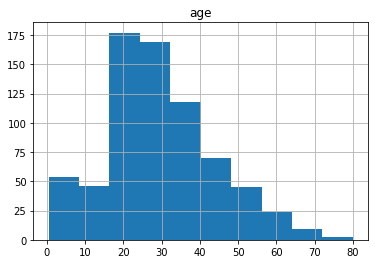

In [13]:
X.hist('age')

In [14]:
X['age'] = X['age'].fillna(X.age.median()) # because the hist is skewed
print (X.age.isnull().sum())

0


### Treating Missing Values in Embarked

In [15]:
print (X.Embarked.mode()[0]) 
X['Embarked'] = X['Embarked'].fillna(X.Embarked.mode()[0])
print (X.Embarked.isnull().sum())

S
0


# EDA

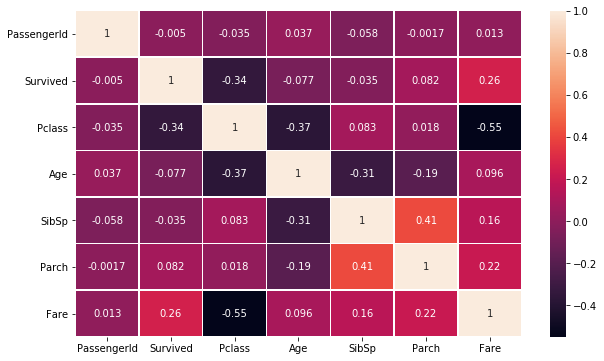

In [16]:
data = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(data , annot = True  , linewidth = 0.5)
plt.show()

### Any high correlation between independent variables cannot be seen.

In [59]:
num_columns = list(df._get_numeric_data().columns)
all_columns = list(df.columns)
num_columns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
cat_columns = []
for i in all_columns:
    if i not in num_columns:
        cat_columns.append(i)
print(cat_columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [24]:
cat_columns = cat_columns[1::3]
cat_columns

['Sex', 'Embarked']

In [27]:
num_columns = num_columns[2:-1]
num_columns

['Pclass', 'Age', 'SibSp', 'Parch']

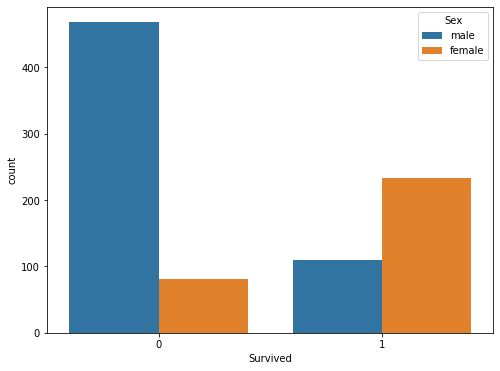

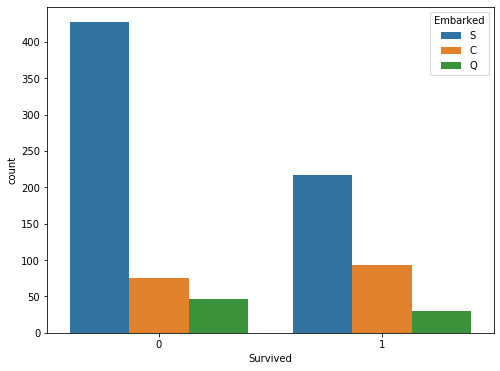

In [31]:
for i in cat_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(df['Survived'] , hue=df[i])
    plt.show()

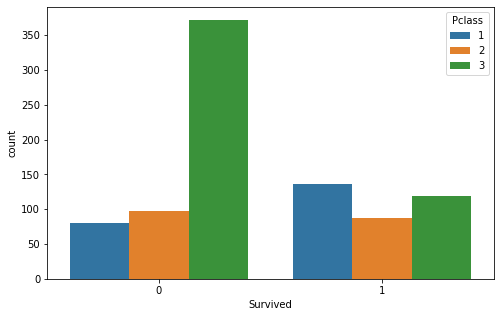

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(df['Survived'] , hue=df['Pclass'])
plt.show()

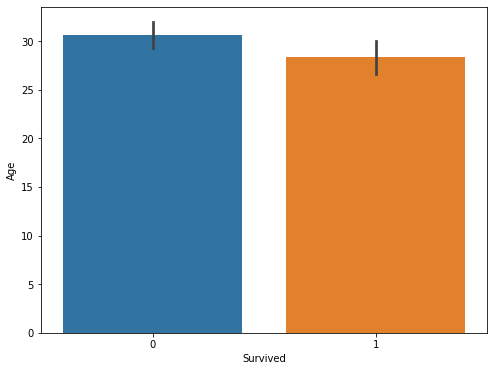

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(df['Survived'] , df['Age'])
plt.show()

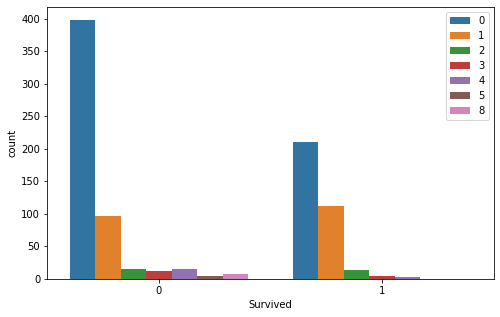

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(df['Survived'] , hue=df['SibSp'])
plt.legend(loc=1)
plt.show()

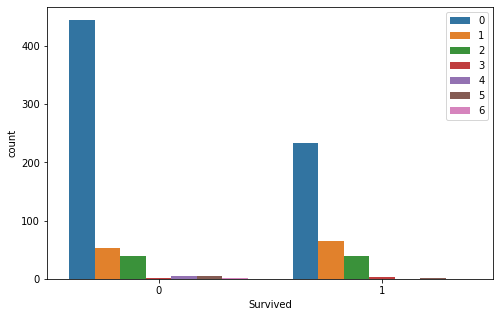

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(df['Survived'] , hue=df['Parch'])
plt.legend(loc=1)
plt.show()

### ANALYZED RESULTS

1. More females have survived in comparison with males.
2. More people who embarked from S have survived in comparison with other people.
3. More people from from pclass-1 have survived whereas more people from pclass-3 have died.
4. People with an average age of around 30 have not survived.
5. People with no siblings have survived in more number and also died in more number.
6. People travelling with parch-0 have survived in more number and also died in more number.

# DATA PRE-PROCESSING

### Creating dummies for varibles Embarked

In [60]:
X = X.join(pd.get_dummies(df.Embarked, prefix ='Embarked'))
display (X[:5])

,sex,age,pclass,sibsp,parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,male,22.0,3,1,0,S,0,0,1
1,female,38.0,1,1,0,C,1,0,0
2,female,26.0,3,0,0,S,0,0,1
3,female,35.0,1,1,0,S,0,0,1
4,male,35.0,3,0,0,S,0,0,1


In [61]:
X = X.drop(['Embarked_C', 'Embarked'], axis=1)
display (X[:5])

,sex,age,pclass,sibsp,parch,Embarked_Q,Embarked_S
0,male,22.0,3,1,0,0,1
1,female,38.0,1,1,0,0,0
2,female,26.0,3,0,0,0,1
3,female,35.0,1,1,0,0,1
4,male,35.0,3,0,0,0,1


### Creating dummies for varibles Sex

In [63]:
X = X.join(pd.get_dummies(df.Sex, prefix ='Sex'))
display (X[:5])

,sex,age,pclass,sibsp,parch,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,male,22.0,3,1,0,0,1,0,1
1,female,38.0,1,1,0,0,0,1,0
2,female,26.0,3,0,0,0,1,1,0
3,female,35.0,1,1,0,0,1,1,0
4,male,35.0,3,0,0,0,1,0,1


In [65]:
X = X.drop(['sex', 'Sex_male'], axis=1)
display (X[:5])

,age,pclass,sibsp,parch,Embarked_Q,Embarked_S,Sex_female
0,22.0,3,1,0,0,1,0
1,38.0,1,1,0,0,0,1
2,26.0,3,0,0,0,1,1
3,35.0,1,1,0,0,1,1
4,35.0,3,0,0,0,1,0


### Standardizing Age variable

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
display (X[:5])
X.age = scaler.fit_transform(X[['age']])
display (X[:5])

,age,pclass,sibsp,parch,Embarked_Q,Embarked_S,Sex_female
0,22.0,3,1,0,0,1,0
1,38.0,1,1,0,0,0,1
2,26.0,3,0,0,0,1,1
3,35.0,1,1,0,0,1,1
4,35.0,3,0,0,0,1,0


,age,pclass,sibsp,parch,Embarked_Q,Embarked_S,Sex_female
0,-0.565736,3,1,0,0,1,0
1,0.663861,1,1,0,0,0,1
2,-0.258337,3,0,0,0,1,1
3,0.433312,1,1,0,0,1,1
4,0.433312,3,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001336621B308>]],
      dtype=object)

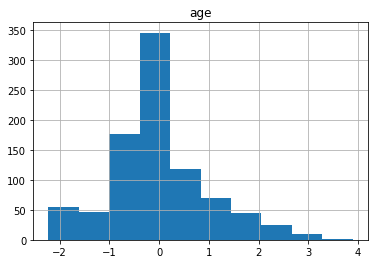

In [67]:
X.hist('age')

# MODEL BUILDING

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [71]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [84]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
print('The classification report is as follows:\n',classification_report(y_test , lr.predict(X_test)))
print()
print('The accuracy score is {:.2f} %'.format(accuracy_score(y_test,lr.predict(X_test)) * 100))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


The accuracy score is 80.45 %


In [89]:
coef_dataframe = pd.DataFrame()
coef_dataframe["Variables"] = X_train.columns
coef_dataframe["Co-efficient"] = lr.coef_[0]
coef_dataframe

,Variables,Co-efficient
0,age,-0.395838
1,pclass,-1.013575
2,sibsp,-0.277356
3,parch,-0.076976
4,Embarked_Q,-0.147748
5,Embarked_S,-0.468842
6,Sex_female,2.588391


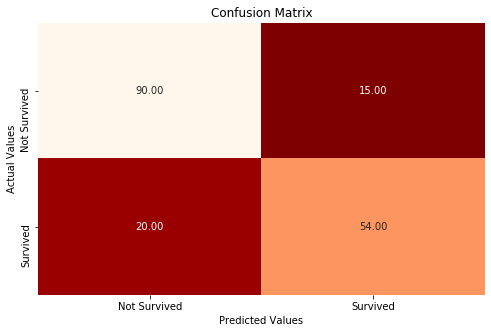

In [80]:
cf = confusion_matrix(y_test , lr.predict(X_test))
plt.figure(figsize = (8,5))
sns.heatmap(np.array([cf[0] , cf[1]]) , annot = True ,fmt='.2f', cmap = "OrRd_r" , cbar=False,
            xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

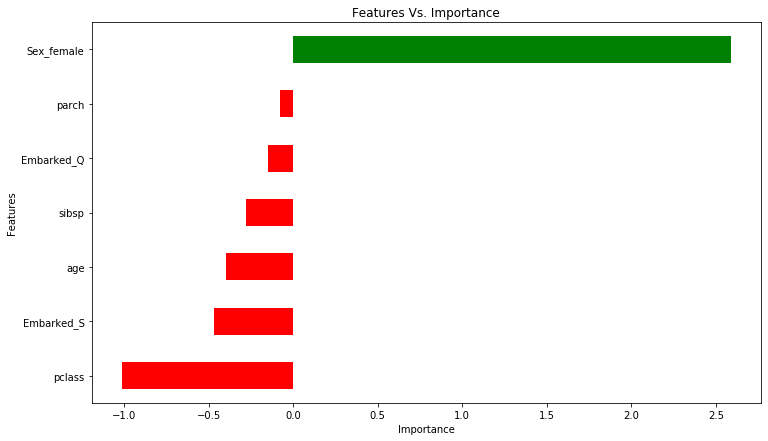

In [82]:
frame = pd.DataFrame()
frame['Features'] = X_train.columns
frame['Importance'] = lr.coef_[0]
frame['positive'] = frame['Importance'] > 0
frame.set_index("Features" , inplace = True)
frame.sort_values(by = ["Importance"] , ascending = True , inplace = True)
frame.Importance.plot(kind = 'barh' , figsize=(12, 7), color = frame.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance')
plt.title("Features Vs. Importance")
plt.show()

# CONCLUSION

In [105]:
print('The accuracy score is {:.2f} %'.format(accuracy_score(y_test,lr.predict(X_test)) * 100))
print('The most influencing variable is "Sex_female" with a co-efficient of {:.2f}'.format(coef_dataframe.max()[1]))

The accuracy score is 80.45 %
The most influencing variable is "Sex_female" with a co-efficient of 2.59
